In [1]:
import numpy as np 
import pandas as pd 
import keras 
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import glob
import os

Using TensorFlow backend.


In [2]:
from sklearn.datasets import load_files
import numpy as np

train_dir = r'C:\Users\deVam\fruits-360\Training'
test_dir = r'C:\Users\deVam\fruits-360\Test'

def load_dataset(path):
    data = load_files(path)
    files = np.array(data['filenames'])
    targets = np.array(data['target'])
    target_labels = np.array(data['target_names'])
    return files,targets,target_labels
    
x_train, y_train,target_labels = load_dataset(train_dir)
x_test, y_test,_ = load_dataset(test_dir)
print('Loading complete!')

print('Training set size : ' , x_train.shape[0])
print('Testing set size : ', x_test.shape[0])

Loading complete!
Training set size :  67692
Testing set size :  22688


In [3]:
no_of_classes = len(np.unique(y_train))
no_of_classes

131

In [4]:
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train,no_of_classes)
y_test = np_utils.to_categorical(y_test,no_of_classes)

In [5]:
from sklearn.model_selection import  train_test_split
x_test,x_valid,y_test,y_valid=train_test_split(x_test,y_test,test_size=0.2,random_state=42)

In [6]:
x_valid.shape, y_valid.shape

((4538,), (4538, 131))

In [7]:
x_test.shape,y_test.shape

((18150,), (18150, 131))

In [8]:
from keras.preprocessing.image import array_to_img, img_to_array, load_img

def convert_image_to_array(files):
    images_as_array=[]
    for file in files:
        # Convert to Numpy Array
        images_as_array.append(img_to_array(load_img(file)))
    return images_as_array

x_train = np.array(convert_image_to_array(x_train))
print('Training set shape : ',x_train.shape)

x_valid = np.array(convert_image_to_array(x_valid))
print('Validation set shape : ',x_valid.shape)

x_test = np.array(convert_image_to_array(x_test))
print('Test set shape : ',x_test.shape)

print('1st training image shape ',x_train[0].shape)

Training set shape :  (67692, 100, 100, 3)
Validation set shape :  (4538, 100, 100, 3)
Test set shape :  (18150, 100, 100, 3)
1st training image shape  (100, 100, 3)


In [9]:
x_train = x_train.astype('float32')/255
x_valid = x_valid.astype('float32')/255
x_test = x_test.astype('float32')/255

In [17]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D
from keras.layers import Activation, Dense, Flatten, Dropout,Activation,BatchNormalization
from keras.optimizers import Adamax
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras import backend as K

model = Sequential()
model.add(Conv2D(filters = 16, kernel_size = (3,3),input_shape=(100,100,3),padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 32,kernel_size = (3,3),activation = 'relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 32,kernel_size = (3,3),activation = 'relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())

model.add(Dense(1024,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(131,activation = 'softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 100, 100, 16)      448       
_________________________________________________________________
activation_2 (Activation)    (None, 100, 100, 16)      0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 100, 100, 16)      64        
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 50, 50, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 50, 50, 32)        4640      
_________________________________________________________________
batch_normalization_5 (Batch (None, 50, 50, 32)        128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 25, 25, 32)       

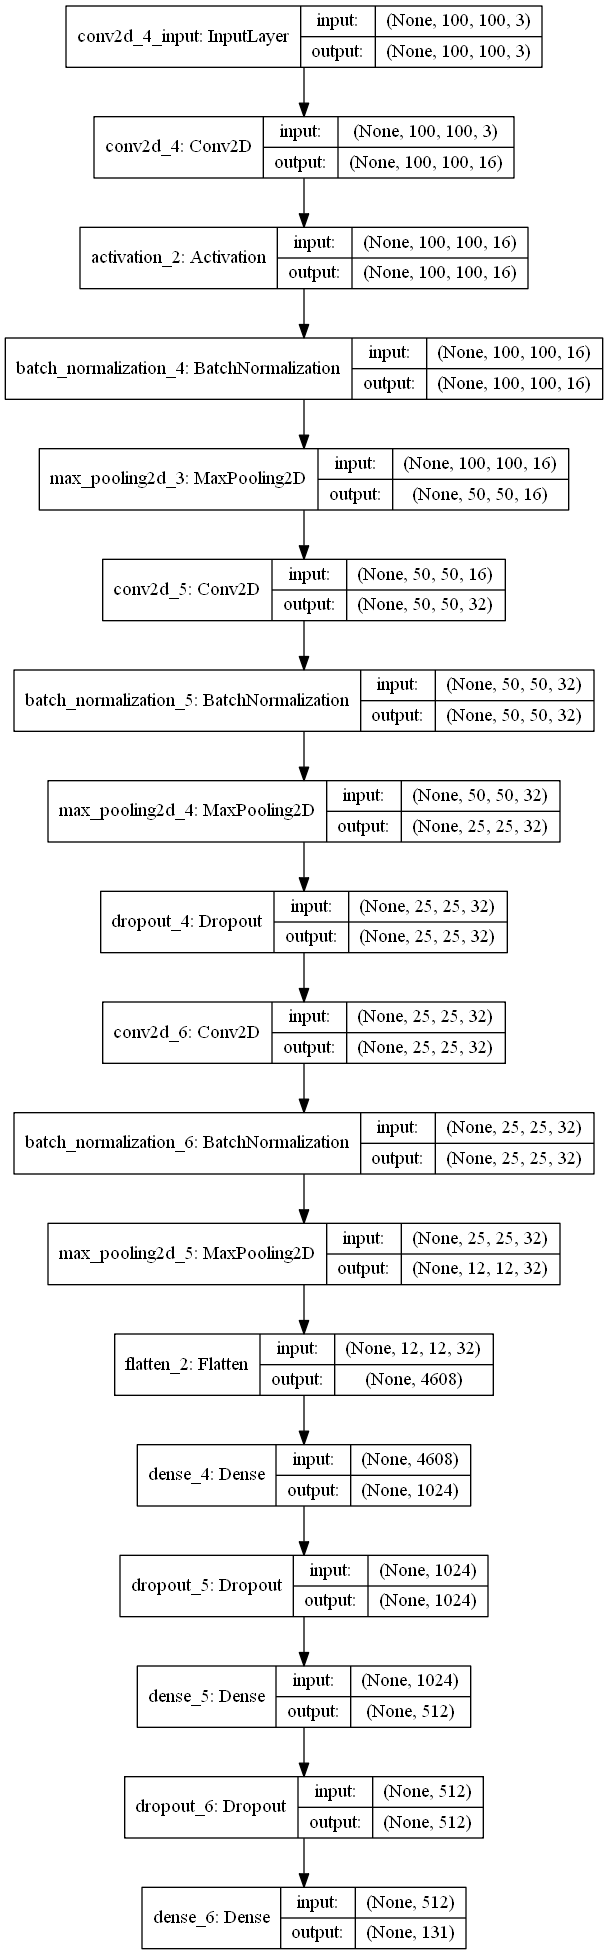

In [18]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot_fruits_2.png', show_shapes=True, show_layer_names=True)

In [19]:
model.compile(loss='categorical_crossentropy',
              optimizer='Adamax',
              metrics=['accuracy'])

In [20]:
learned_weights = ModelCheckpoint(filepath = 'fruits_360_weights_1.hdf5', verbose = 1, save_best_only = True)

history = model.fit(x_train,y_train,
        batch_size = 50,
        epochs=30,
        validation_data=(x_valid, y_valid),
        callbacks = [learned_weights],
        verbose=2, shuffle=True)

Train on 67692 samples, validate on 4538 samples
Epoch 1/30
 - 486s - loss: 0.9808 - accuracy: 0.7529 - val_loss: 0.2785 - val_accuracy: 0.9440

Epoch 00001: val_loss improved from inf to 0.27849, saving model to fruits_360_weights_1.hdf5
Epoch 2/30
 - 475s - loss: 0.1138 - accuracy: 0.9640 - val_loss: 0.2414 - val_accuracy: 0.9586

Epoch 00002: val_loss improved from 0.27849 to 0.24136, saving model to fruits_360_weights_1.hdf5
Epoch 3/30
 - 474s - loss: 0.0537 - accuracy: 0.9835 - val_loss: 0.2110 - val_accuracy: 0.9665

Epoch 00003: val_loss improved from 0.24136 to 0.21102, saving model to fruits_360_weights_1.hdf5
Epoch 4/30
 - 474s - loss: 0.0372 - accuracy: 0.9886 - val_loss: 0.2245 - val_accuracy: 0.9703

Epoch 00004: val_loss did not improve from 0.21102
Epoch 5/30
 - 472s - loss: 0.0285 - accuracy: 0.9914 - val_loss: 0.2133 - val_accuracy: 0.9753

Epoch 00005: val_loss did not improve from 0.21102
Epoch 6/30
 - 473s - loss: 0.0199 - accuracy: 0.9935 - val_loss: 0.3134 - val_a

In [21]:
model.load_weights('fruits_360_weights_1.hdf5')

In [26]:
accuracy = model.evaluate(x_test, y_test, verbose=0)
print(accuracy[1])

0.9850137829780579


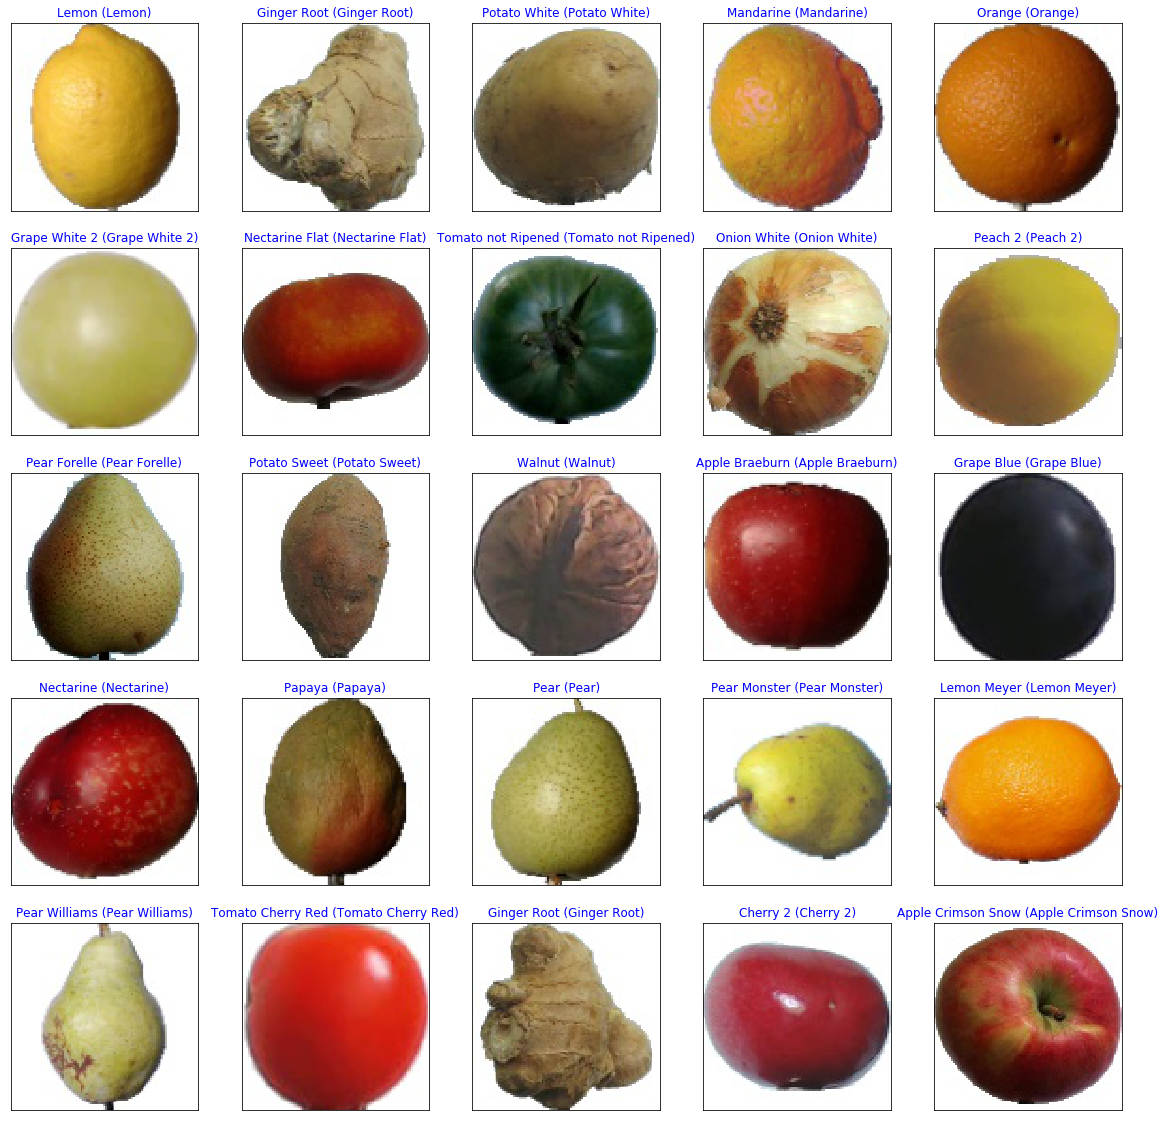

In [28]:
y_pred = model.predict(x_test)

fig = plt.figure(figsize=(20, 20))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=25, replace=False)):
    ax = fig.add_subplot(5, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_pred[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(target_labels[pred_idx], target_labels[true_idx]),
                 color=("blue" if pred_idx == true_idx else "black"))